In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.set()

In [113]:
# importing dataset
data = pd.read_csv('data.csv')
data = data.drop(columns = ['id', 'Unnamed: 32']).copy()
#data = data.iloc[:, :11]
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Analyse whether any data is missing, and get an idea of how the data looks

In [114]:
print(data.columns)
assert max(data.isnull().sum()) == 0
data.describe()

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

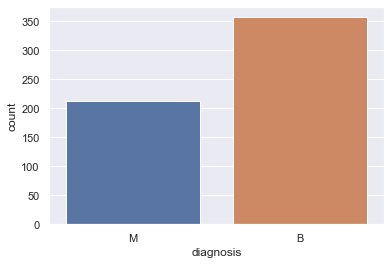

In [8]:
sns.countplot(x="diagnosis", data=data)

Exploratory analysis
---

Here we observe that malignant observations are larger in radius, thus also in area and perimeter. There is also a clear trend of more concavity points and higher values for concavity when the observation is malignant.

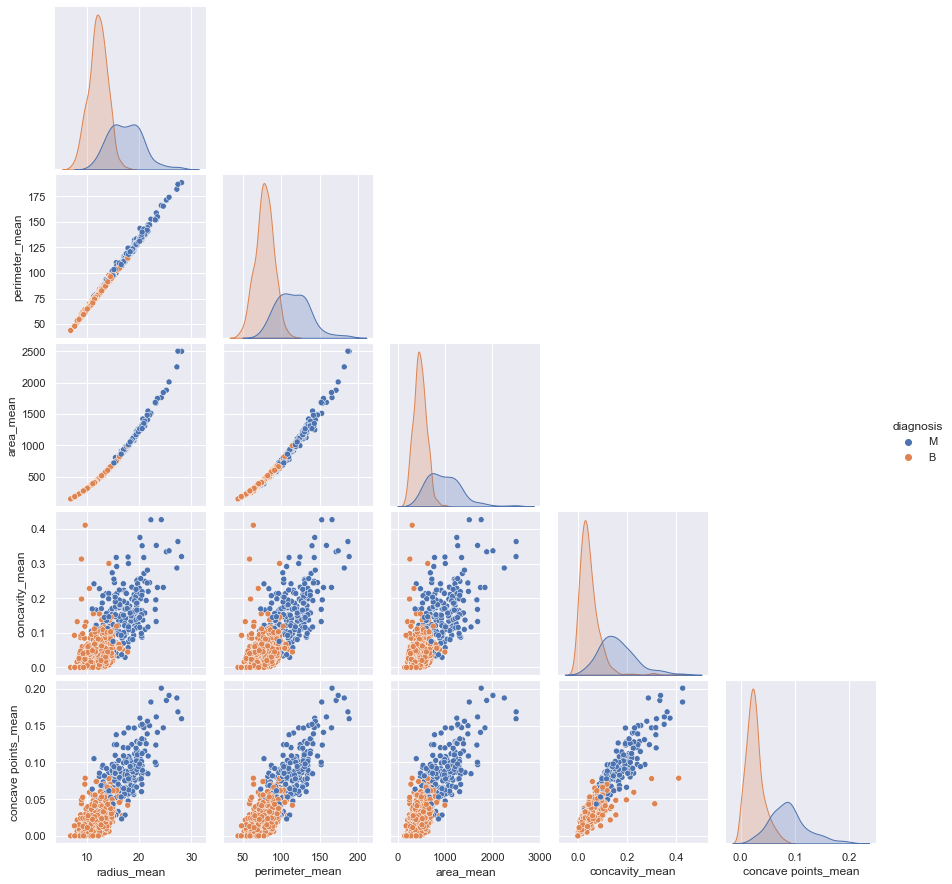

In [9]:
sns.pairplot(data=data, vars = data.iloc[:, [1,3,4,7,8]], hue = 'diagnosis', corner=True)

(10, 10)


<AxesSubplot:>

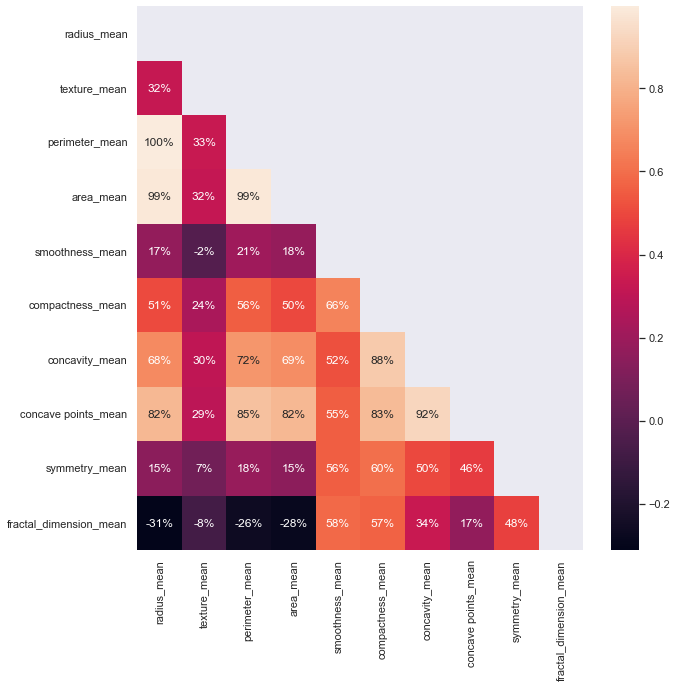

In [10]:
size = 10

plt.figure(figsize=(size, size))

mask = np.array([[True] * size] * size)
print(mask.shape)
for i in range(size):
    for j in range(i):
        mask[i][j] = False

correlated_data = data.iloc[:, :size+1].corr()
sns.heatmap(correlated_data, annot=True, fmt='.0%', mask=mask)

Preprocessing
---
Label encode diagnosis

Split the data into datapoints and results

In [115]:
from sklearn.preprocessing import LabelEncoder
data.iloc[:, 0] = LabelEncoder().fit_transform(data.iloc[:, 0].values)

X = data.drop(columns='diagnosis', axis = 1).copy()

y = data['diagnosis']
X.shape

(569, 30)

In [56]:
X

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.59846245, 0.41886396,
        0.        ],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.23358959, 0.22287813,
        0.        ],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.40370589, 0.21343303,
        0.        ],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.12872068, 0.1519087 ,
        0.        ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.49714173, 0.45231536,
        0.        ],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.25744136, 0.10068215,
        0.        ]])

In [116]:
# imo je diskutabilne ake uzitocne je odstranovat takymto sposobom columns

# tak se vetsinou dela, ze proste odstranime sloupce hodne korelujici. Co by bylo lepsi podle tebe?
correlated_features = set()
correlation = X.corr()

for i in range(len(correlation.columns)):
    for j in range(i):
        if (abs(correlation.iloc[i, j]) > 0.9 and abs(correlation.iloc[i, j]) != 1):
            colname = correlation.columns[i]
            correlated_features.add(colname)

X = X.drop(columns=correlated_features, axis=1).copy()

print(X.shape)

correlated_features

(569, 20)


{'area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

In [ ]:
# Toto mame v exploratory analysis, na ose x=-y

# #distribuce dat
# for column in data.columns[1:11]:
#     sns.displot(data[column], rug = True)
#     plt.show()

Outliers

In [96]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import make_pipeline
#chtel jjsme se podivat ...
pipeline = make_pipeline(MinMaxScaler(), LocalOutlierFactor())
outliers = pipeline.fit_predict(data)==-1
#data["outlier"] = pd.Series(outliers)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


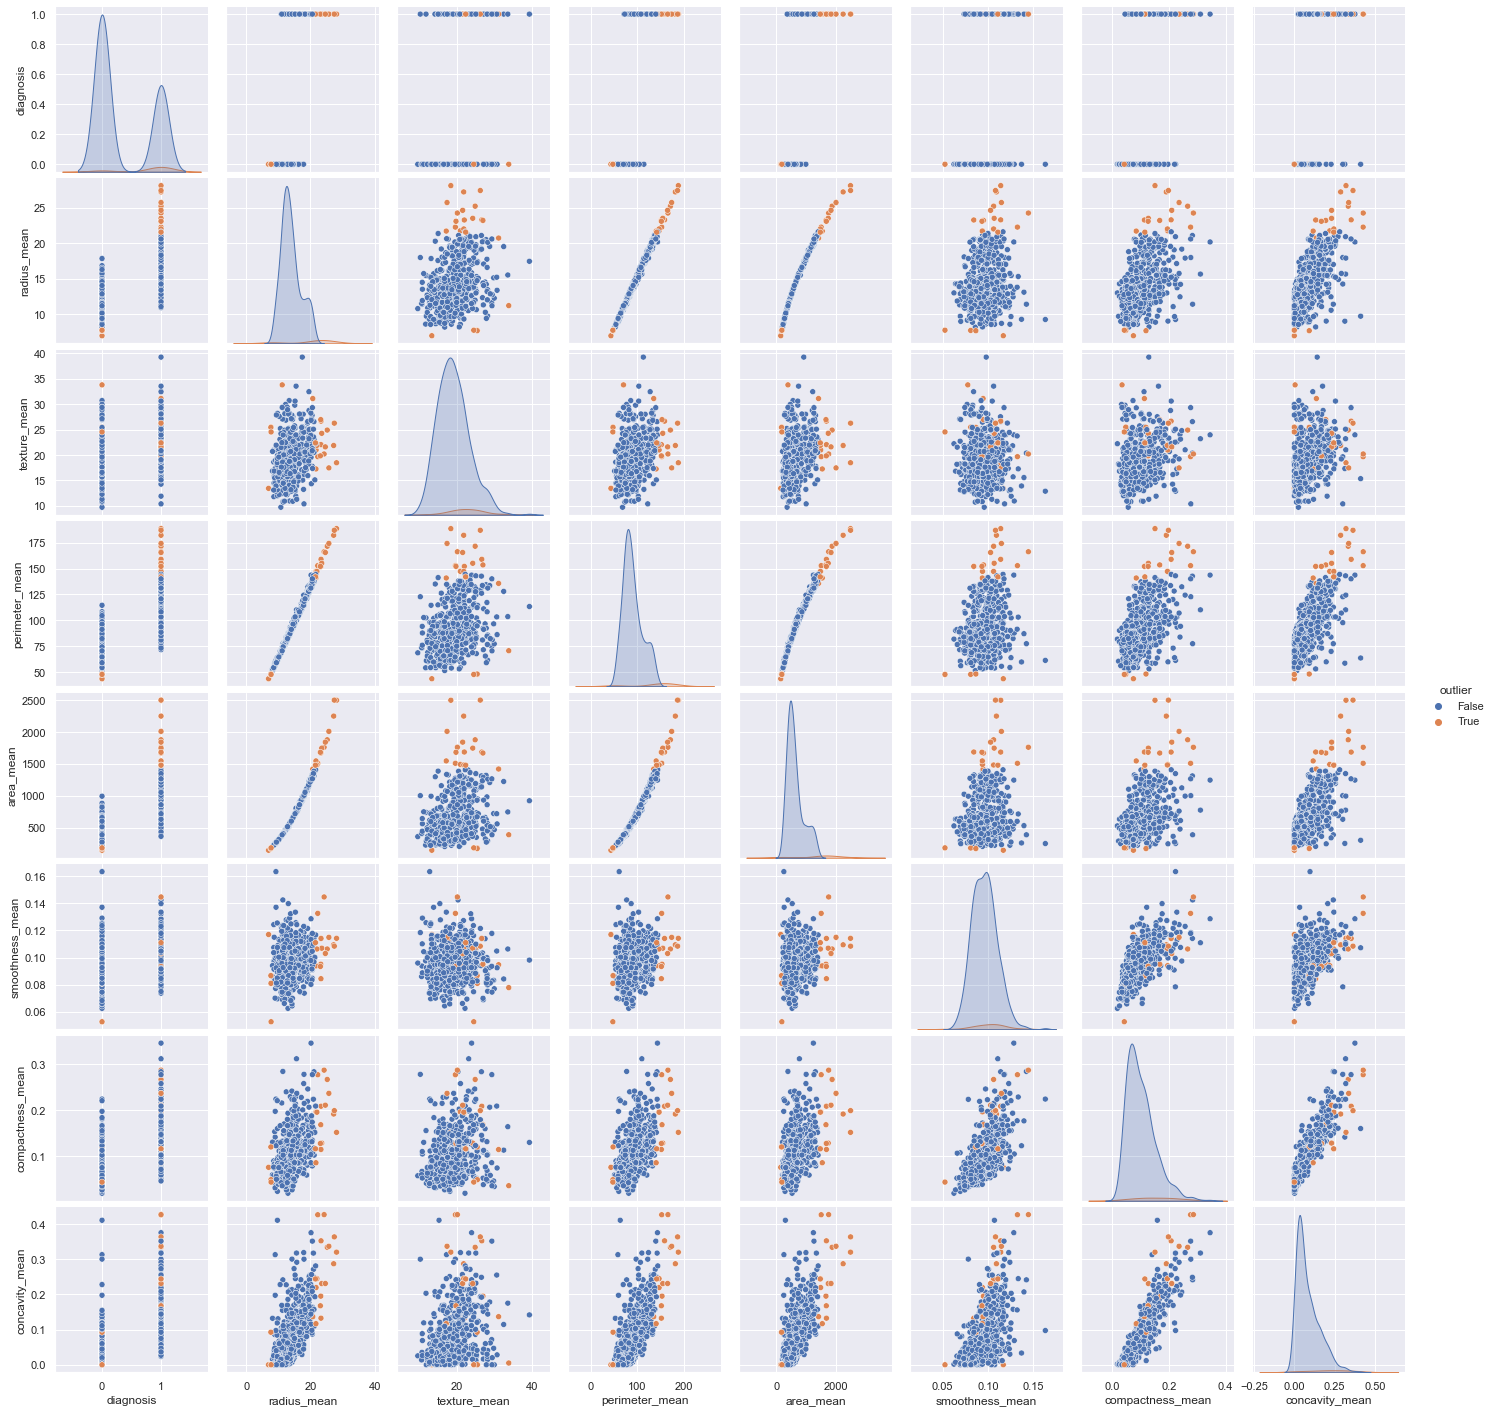

In [69]:
# toto dost zjavne nie je prave presne, asi sa treba pozriet na nastavenia LocalOutlierFactor
sns.pairplot(data, vars=data.iloc[:, :8],  hue = 'outlier')

In [109]:
from sklearn.model_selection import train_test_split

X, y = data.drop(columns='diagnosis'), data['diagnosis']
X = MinMaxScaler().fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train, X_validation, y_train, y_validation = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

Decision tree model
---
Grid search

In [ ]:
#data = data.iloc[:, :11]

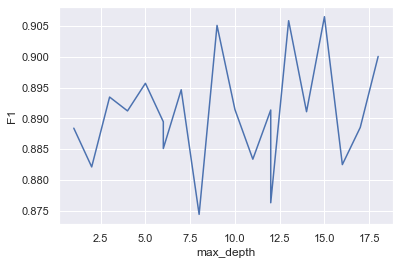

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
range_depth = np.linspace(1, 18, 21, dtype='int')
grid_parameter = {'max_depth':range_depth}
dtc = DecisionTreeClassifier()

# tento grid_clf_1 je tu len kvoli tomu grafu, ze? 

# Jo, to je jen ukazka co vypadne z grid search
grid_clf_1 = GridSearchCV(dtc, grid_parameter, scoring = 'f1', cv=10)
grid_clf_1.fit(X_train, y_train)
scores = grid_clf_1.cv_results_['mean_test_score']

plt.figure()
plt.plot(range_depth, scores, 'b')

plt.xlabel('max_depth')
plt.ylabel('F1')

plt.show()

In [76]:
grid_parameters = {'max_depth':range_depth, 'min_samples_leaf':range_depth, 'criterion': ['gini', 'entropy']}
grid_clf_2 = GridSearchCV(dtc, grid_parameters, scoring = 'f1', cv=5, refit=True)
grid_clf_2.fit(X_train, y_train)
grid_clf_2.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1}

In [77]:
grid_clf_2.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [46]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc_pipeline = make_pipeline(DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, criterion = 'gini', random_state=0))
dtc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=15, min_samples_leaf=2,
                                        random_state=0))])

Compare our models

In [47]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score
from sklearn.model_selection import cross_val_score


pred = dtc.predict(X_test)
# tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
dtc_scores = (f1_score(y_test, pred),
    recall_score(y_test, pred),
    dtc.score(X_test, y_test),
    cross_val_score(dtc, X_train, y_train, cv=10).mean())
""""""
pred = grid_clf_1.predict(X_test)
grid_1_scores = (f1_score(y_test, pred),
    recall_score(y_test, pred),
    dtc_pipeline.score(X_test, y_test),
    cross_val_score(grid_clf_1, X_train, y_train, cv=10).mean())

pred = grid_clf_2.predict(X_test)
grid_2_scores = (f1_score(y_test, pred),
    recall_score(y_test, pred),
    dtc_pipeline.score(X_test, y_test),
    cross_val_score(grid_clf_2, X_train, y_train).mean())

In [86]:
from sklearn.metrics import accuracy_score
optimized = grid_clf_2.best_estimator_
pred = optimized.predict(X_test)
grid_2_scores = (f1_score(y_test, pred),
    recall_score(y_test, pred),
    optimized.score(X_test, y_test),
    accuracy_score(pred, y_test),
    cross_val_score(optimized, X_train, y_train).mean())

In [87]:
#to
grid_2_scores

(0.9411764705882352,
 0.9302325581395349,
 0.956140350877193,
 0.956140350877193,
 0.9396118721461187)

In [48]:

decision_tree_methods_scores = [dtc_scores, grid_1_scores, grid_2_scores]
names_of_dtc_methods = ["dtc_scores", "grid_1_scores", "grid_2_scores"]

for i in range(4):
    largest = 0
    index_of_largest = 0
    for j in range(3):
        current = decision_tree_methods_scores[j][i]
        if current > largest:
            largest = current
            index_of_largest = j
    print(names_of_dtc_methods[index_of_largest])

dtc_scores
dtc_scores
dtc_scores
dtc_scores


In [49]:
confusion_matrix(y_test, pred)
###

array([[68,  3],
       [ 4, 39]], dtype=int64)

In [53]:
pred = dtc_pipeline.predict(X_test)
f1_score(y_test, pred)

0.9285714285714286

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

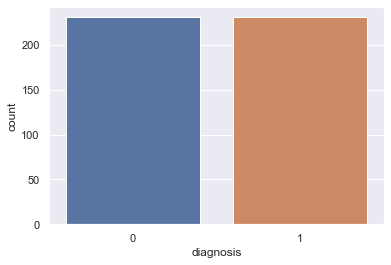

In [110]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=43, k_neighbors=30)
X_res, y_res = sm.fit_resample(X_train, y_train)


sns.countplot(y_res)

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
#grid search! + nevyhazovat featury
RFC = RandomForestClassifier(max_depth=3)
RFC.fit(X_res, y_res)

RandomForestClassifier(max_depth=3)

In [100]:
pred = RFC.predict(X_test)

print(round(RFC.score(X_test, y_test), 2))
recall_score(y_test, pred)


0.96


0.9767441860465116

In [27]:
f1_score(y_test, pred)

0.9772727272727273

In [112]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01,
    max_depth=5, min_samples_leaf = 5,random_state=0).fit(X_res, y_res)
clf.score(X_test, y_test)
pred = clf.predict(X_test)
print(round(clf.score(X_train, y_train), 2))
Y = LabelEncoder()
pred_en = Y.fit_transform(pred)
y_en = Y.fit_transform(y_test)
print(round(clf.score(X_test, y_test), 2))
print("recall: ", (recall_score(y_en, pred_en)))
f1_score(y_en, pred_en)

0.99
0.95
recall:  0.9534883720930233


0.9318181818181819

In [91]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0).fit(X_train, y_train)
pred = LR.predict(X_validation)

recall_score(y_validation, pred)
f1_score(y_validation, pred)

0.8985507246376813

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.949


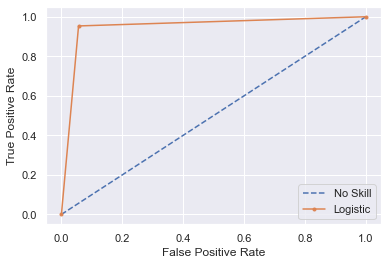

In [104]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, pred)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()